### Description

#### Context
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

#### Content
This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

So far I know, there is no missing value.

#### Glossary
* Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
* Minions: NPC that belong to both teams. They give gold when killed by players.
* Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
* Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
* Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
* Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.
* Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
* Level: Champion level. Start at 1. Max is 18.

#### Acknowledgements
Thanks, Rito Gaming.

### Description of the analysis procedure

* 1-Load the dataset
* 2-Clean the dataset
* 3-Exploratory dataset analysis
* 4-Search for the most important variables of the dataset
* 5-Create the most effective predictive models
* 6-Conclusion

### 1-Load the dataset

In this section, I will import all the libraries that I will need in this project and load the dataset that I will use for prediction.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [3]:
df.shape

(9879, 40)

The dataset is made up of:
* 9879 rows
* 40 columns

### 2-Clean the dataset

In this section, I will explore all the dataset searching posible mistake inside the dataset. These mistakes could be missing values, columns witch have incorrect format.. etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

#### Mising values

In [5]:
def mising_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))

In [6]:
mising_values(df)

,Total,Percent
redGoldPerMin,0,0.0
redCSPerMin,0,0.0
blueGoldDiff,0,0.0
blueTotalJungleMinionsKilled,0,0.0
blueTotalMinionsKilled,0,0.0
blueTotalExperience,0,0.0
blueAvgLevel,0,0.0
blueTotalGold,0,0.0
blueTowersDestroyed,0,0.0
blueHeralds,0,0.0


I can see that there is no null value in the dataset.

In [7]:
columns=df.columns.values
count=0
for feature in columns:
    if(df[feature].dtype=="int64" or df[feature].dtype=="float64"):
        count+=1
        
count

40

I can see that there are no null values and all the dataset values are numeric, so I can start with exploratory analysis of the data.

### 3-Exploratory dataset analysis

The objective of this project is to predict the "blueWin" field of the dataset. To perform the predictive model I need to know how the "blueWin" field is related to the other fields in the dataset.

The first thing is to know how the "blueWin" data is distributed:

Text(0.5, 1.0, 'Blue Wins')

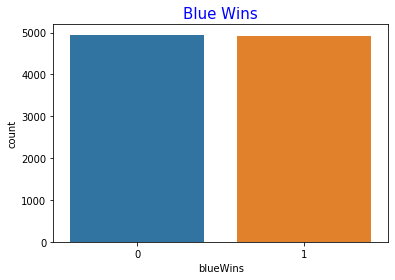

In [8]:
sns.countplot(df.blueWins)
#sns.countplot(kill.manner_of_death)
plt.title("Blue Wins",color = 'blue',fontsize=15)

I can see that the number of lost games for the blue team are the same for the red team.
Next, I'm going to show what the distribution is like for each of the fields in the dataset:

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


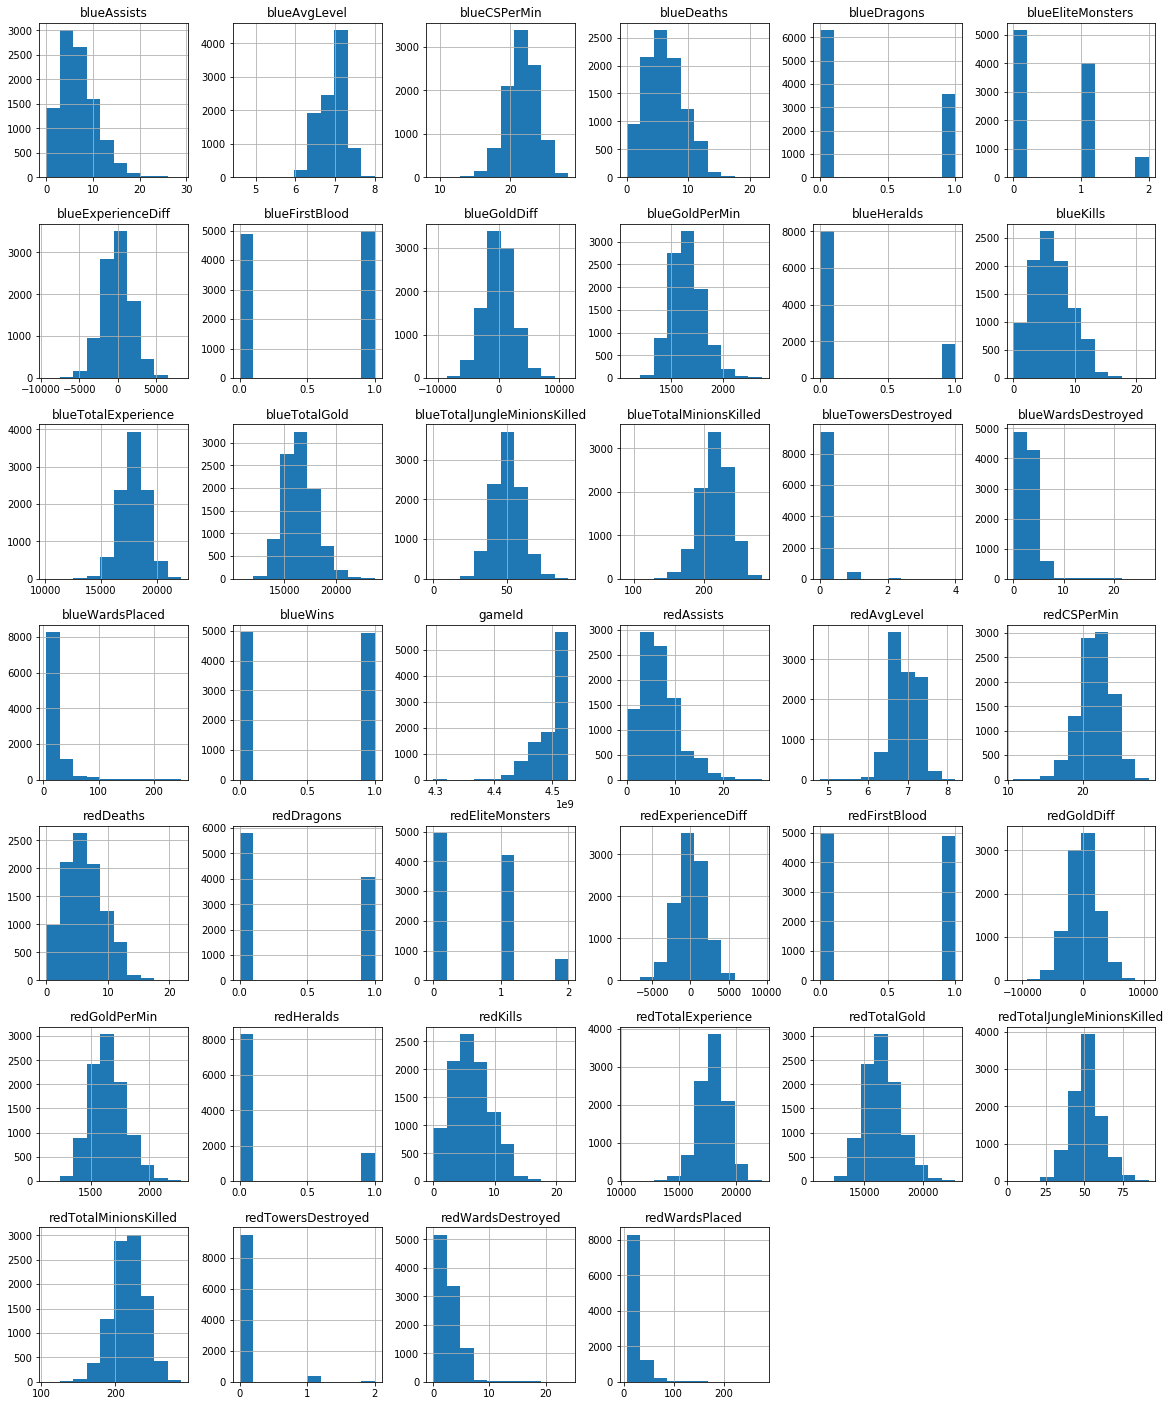

In [9]:
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

If we want to see how a field that may seem important to the analysis (such as the number of kills in a game or the difference in gold between the two teams) is related to the result of that game:

Text(0, 0.5, 'Result of the match')

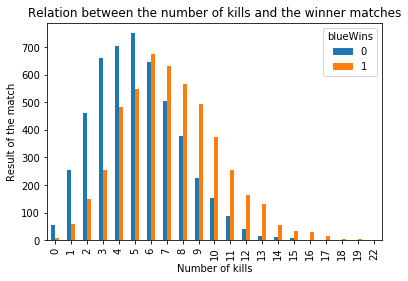

In [10]:
%matplotlib inline
pd.crosstab((df.blueKills),df.blueWins).plot(kind="bar")
plt.title("Relation between the number of kills and the winner matches")
plt.xlabel("Number of kills")
plt.ylabel("Result of the match")

Text(0, 0.5, 'Result of the match')

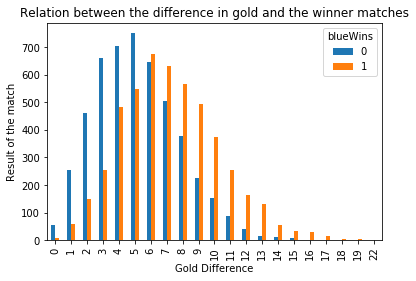

In [11]:
%matplotlib inline
pd.crosstab((df.blueKills),df.blueWins).plot(kind="bar")
plt.title("Relation between the difference in gold and the winner matches")
plt.xlabel("Gold Difference")
plt.ylabel("Result of the match")

I can see that these two fields have a direct relationship with the result of the game. When the gold difference or the number of kills increases, the number of games won increases.

In the opposite case, we are going to analyze the relationship that there is with a field that I think is not so important (blueHeralds) with the games won:

Text(0, 0.5, 'Result of the match')

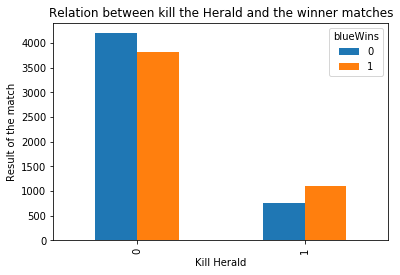

In [12]:
%matplotlib inline
pd.crosstab((df.blueHeralds),df.blueWins).plot(kind="bar")
plt.title("Relation between kill the Herald and the winner matches")
plt.xlabel("Kill Herald")
plt.ylabel("Result of the match")

It can be seen that although the probability of winning the "Herald" increases, it is not an important fact like the previous ones because the difference between the columns is not very big.



Text(0, 0.5, 'Result of the match')

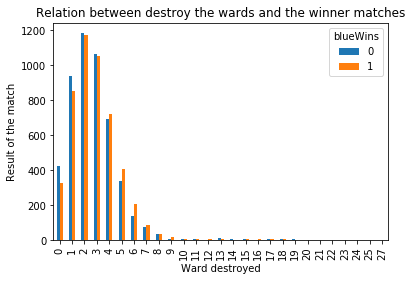

In [13]:
%matplotlib inline
pd.crosstab((df.blueWardsDestroyed),df.blueWins).plot(kind="bar")
plt.title("Relation between destroy the wards and the winner matches")
plt.xlabel("Ward destroyed")
plt.ylabel("Result of the match")

### 4-Search for the most important variables of the dataset

* X will represent the predictor variables.
* Y will represent the variable to be predicted

#### 1- Select by correlation. Package 1:
In this section I am going to select the most important variables to predict "blueWins". To select the variables I will see the correlation between all the variables with the variable to be predicted. I will select the variables that have the highest correlation.

In [14]:
cor = df.corr () 

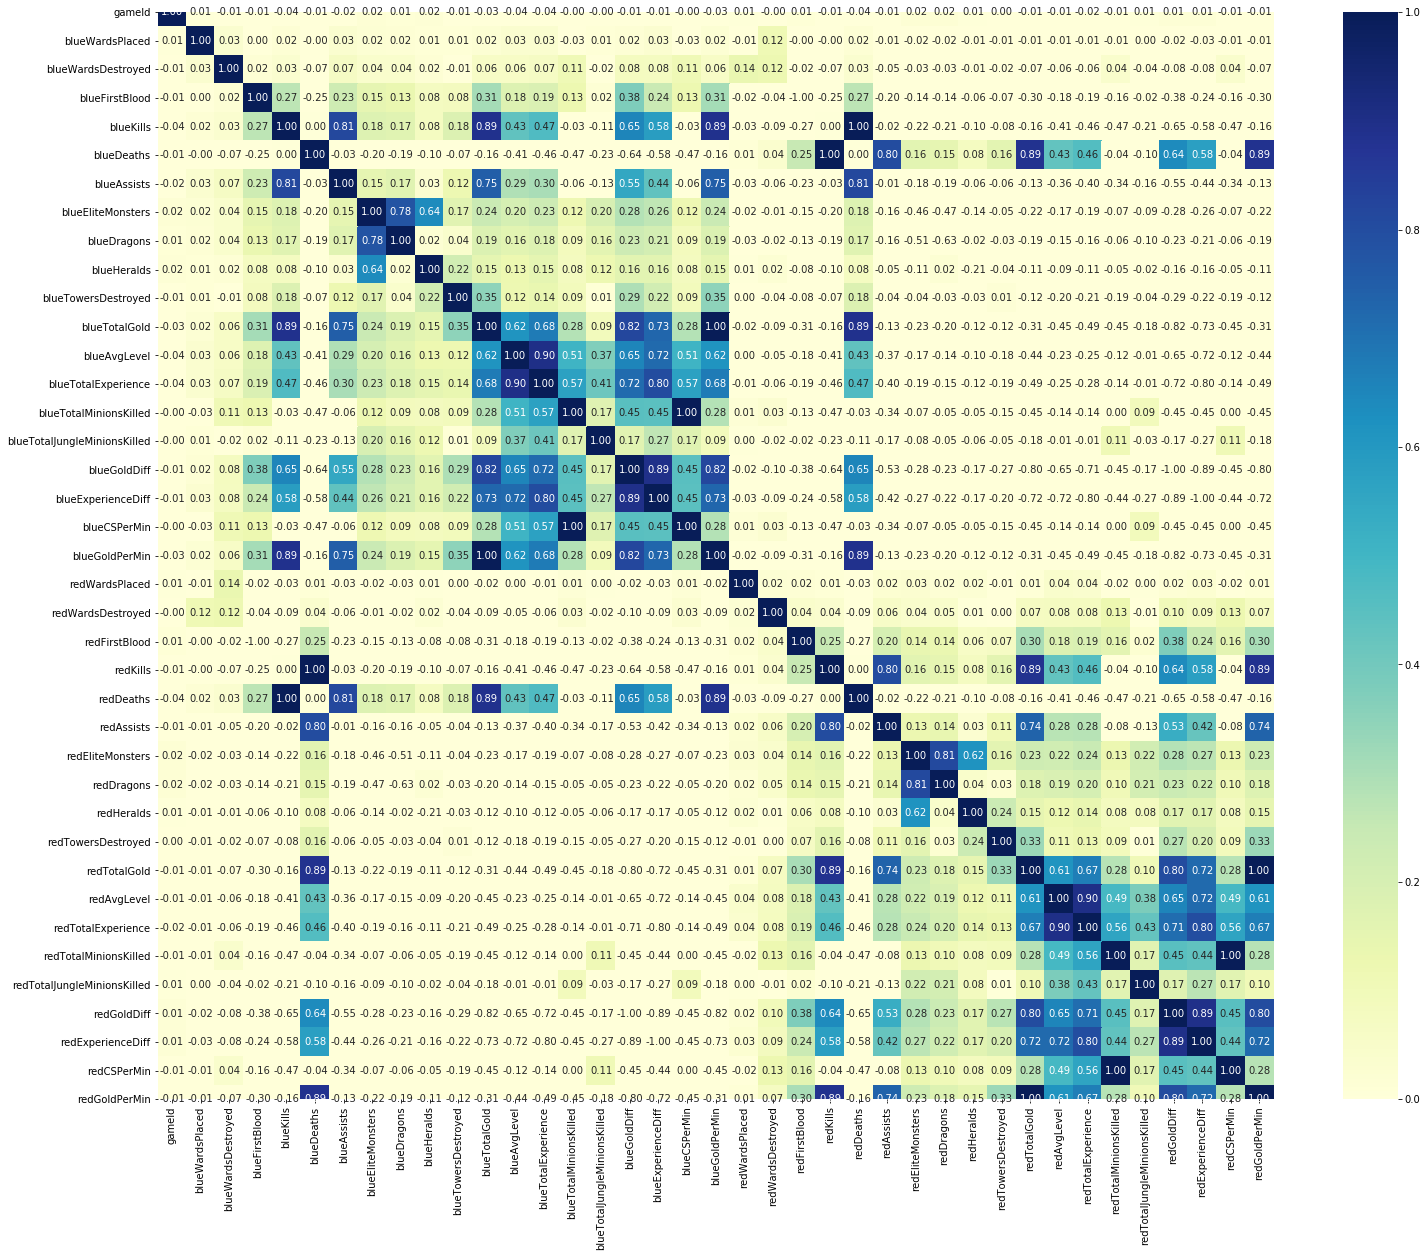

In [15]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [16]:
#Correlation with the output variable

cor_target = abs (cor ["blueWins"]) 

#Select highly correlated features

relevantes_características = cor_target [cor_target> 0.30] 
relevantes_características.sort_values()

blueKills              0.337358
redDeaths              0.337358
blueDeaths             0.339297
redKills               0.339297
redAvgLevel            0.352127
blueAvgLevel           0.357820
redTotalExperience     0.387588
blueTotalExperience    0.396141
redTotalGold           0.411396
redGoldPerMin          0.411396
blueTotalGold          0.417213
blueGoldPerMin         0.417213
blueExperienceDiff     0.489558
redExperienceDiff      0.489558
blueGoldDiff           0.511119
redGoldDiff            0.511119
blueWins               1.000000
Name: blueWins, dtype: float64

In [22]:
X_relevance_featues=["blueGoldDiff","blueExperienceDiff","blueTotalGold","redTotalGold","blueTotalExperience","redTotalExperience",
                   "blueAvgLevel","redAvgLevel","blueDeaths","blueKills","redDeaths","redKills","redGoldDiff","redExperienceDiff","redGoldPerMin"]

In [23]:
X_relevance_featues=df[X_relevance_featues]

Before seeing which variables have the highest correlation with "blueWins", it must be realized that there are many fields in the dataset that have a correlation between them that is too large. 

For example, we have the case of "blueGoldDiff" and "redGoldDiff". In this case the value of one is the negative of the other, so they will have a correlation between them of 100%. For the prediction I will have to discard one of the two fields.

In [24]:
for i in range(0,len(X_relevance_featues.columns)):
    for j in  range(0,len(X_relevance_featues.columns)):
        if i!=j:
            corr_1=np.abs(X_relevance_featues[X_relevance_featues.columns[i]].corr(X_relevance_featues[X_relevance_featues.columns[j]]))
            
            if corr_1>0.99:
                print(corr_1, X_relevance_featues.columns[i] , " is highly  correlated  with ", X_relevance_featues.columns[j])

1.0 blueGoldDiff  is highly  correlated  with  redGoldDiff
1.0 blueExperienceDiff  is highly  correlated  with  redExperienceDiff
1.0 redTotalGold  is highly  correlated  with  redGoldPerMin
1.0 blueDeaths  is highly  correlated  with  redKills
1.0 blueKills  is highly  correlated  with  redDeaths
1.0 redDeaths  is highly  correlated  with  blueKills
1.0 redKills  is highly  correlated  with  blueDeaths
1.0 redGoldDiff  is highly  correlated  with  blueGoldDiff
1.0 redExperienceDiff  is highly  correlated  with  blueExperienceDiff
1.0 redGoldPerMin  is highly  correlated  with  redTotalGold


Features that I will not use:

    blueGoldPerMin,redGoldDiff,redExperienceDiff,redGoldPerMin,redExperienceDiff


In [25]:
relevance_features=["blueGoldDiff","blueExperienceDiff","blueTotalGold","redTotalGold","blueTotalExperience","redTotalExperience",
                   "blueAvgLevel","redAvgLevel","blueDeaths","blueKills"]

In [26]:
X1=df[relevance_features]
y1=df["blueWins"]

In [27]:
X1.shape

(9879, 10)

#### 2- Using feature_selection. Package 2:

In this section I will use the sklearn tools to select the best variables to predict "blueWins".

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
Xsupp= df.drop(['gameId',"blueWins"], axis=1)
y2 = df["blueWins"]

In [30]:
lr= LogisticRegression()

In [31]:
n=10
rfe= RFE(lr,n)
rfe=rfe.fit(Xsupp,y2)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [32]:
rfe.support_

array([False, False,  True, False, False, False,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False])

In [33]:
rfe.ranking_

array([12,  8,  1,  4,  3, 21,  1,  1,  5,  1, 25,  1, 27, 16,  6, 15, 20,
       18, 28, 13, 10, 19,  1,  1, 14,  1,  2, 11,  1, 24,  1, 26,  9,  7,
       22, 23, 17, 29])

In [34]:
columns=Xsupp.columns.values
n=0

relevance_features2=[]

for i in columns:
    
    if(rfe.ranking_[n]==1):
        print(str(i) + " con ranking: " + str(rfe.ranking_[n]))
        relevance_features2.append(i)
    n+=1

blueFirstBlood con ranking: 1
blueEliteMonsters con ranking: 1
blueDragons con ranking: 1
blueTowersDestroyed con ranking: 1
blueAvgLevel con ranking: 1
redKills con ranking: 1
redDeaths con ranking: 1
redEliteMonsters con ranking: 1
redTowersDestroyed con ranking: 1
redAvgLevel con ranking: 1


In [35]:
X2 = df[relevance_features2]
y2 = df["blueWins"]

In [36]:
X2.shape

(9879, 10)

### 5-Create the most effective predictive models
In the previous section I have created two sets of predictor variables, one done manually and the other using the sklearn tools. To see which set of predictor variables works best, I'm going to test the models with both.


* LogisticRegression
* Support Vector Machine
* Decision Tree Classifier
* Random Tree Classifier
* K-Nearest Neighbours
* Gradient Boosting

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

### LogisticRegression:

#### Package 1:

In [39]:
#Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train1,y_train1)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logReg_predict = logReg.predict(X_test1)
logReg_score1 = logReg.score(X_test1,y_test1)
# print("Logistic Regression Prediction :",logReg_predict)
print("Logistic Regression Score :",logReg_score1)

Logistic Regression Score : 0.7231781376518218


In [42]:
print("Accuracy Score of Logistic Regression Model:")
print(metrics.accuracy_score(y_test1,logReg_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,logReg_predict),'\n')

Accuracy Score of Logistic Regression Model:
0.7231781376518218

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.73      0.72      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976
 



#### Package 2:

In [43]:
#Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train2,y_train2)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logReg_predict = logReg.predict(X_test2)
logReg_score2 = logReg.score(X_test2,y_test2)
# print("Logistic Regression Prediction :",logReg_predict)
print("Logistic Regression Score :",logReg_score2)

Logistic Regression Score : 0.7241902834008097


In [45]:
print("Accuracy Score of Logistic Regression Model:")
print(metrics.accuracy_score(y_test2,logReg_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test2,logReg_predict),'\n')

Accuracy Score of Logistic Regression Model:
0.7241902834008097

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.72      0.73      0.73       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976
 



### Support Vector Machine

#### Package 1:

In [46]:
SVC_model = SVC(probability=True)
SVC_model.fit(X_train1,y_train1)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
SVC_predict = SVC_model.predict(X_test1)
SVC_score1 = SVC_model.score(X_test1,y_test1)
#print("Support Vector Classifier Prediction :",SVC_predict)
print("Support Vector Classifier Score :",SVC_score1)

Support Vector Classifier Score : 0.4974696356275304


In [48]:
print("Accuracy Score of Support Vector Classifier SVC Model:")
print(metrics.accuracy_score(y_test1,SVC_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,SVC_predict),'\n')

Accuracy Score of Support Vector Classifier SVC Model:
0.4974696356275304

 Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       983
           1       0.00      0.00      0.00       993

    accuracy                           0.50      1976
   macro avg       0.25      0.50      0.33      1976
weighted avg       0.25      0.50      0.33      1976
 



C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Package 2:

In [49]:
SVC_model = SVC(probability=True)
SVC_model.fit(X_train2,y_train2)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
SVC_predict = SVC_model.predict(X_test2)
SVC_score2 = SVC_model.score(X_test2,y_test2)
#print("Support Vector Classifier Prediction :",SVC_predict)
print("Support Vector Classifier Score :",SVC_score2)

Support Vector Classifier Score : 0.7186234817813765


In [51]:
print("Accuracy Score of Support Vector Classifier SVC Model:")
print(metrics.accuracy_score(y_test2,SVC_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test2,SVC_predict),'\n')

Accuracy Score of Support Vector Classifier SVC Model:
0.7186234817813765

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       983
           1       0.72      0.72      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976
 



### Decision Tree Classifier

#### Package 1:

In [52]:
decisionTreeModel = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
decisionTreeModel.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [53]:
decisionTree_predict = decisionTreeModel.predict(X_test1)
decisionTree_score1 = decisionTreeModel.score(X_test1,y_test1)
#print("Decision Tree Classifier Prediction :",len(decisionTree_predict))
print("Decision Tree Classifier Score :",decisionTree_score1)

Decision Tree Classifier Score : 0.7191295546558705


In [54]:
print("Accuracy Score of Decision Tree Classifier Model:")
print(metrics.accuracy_score(y_test1,decisionTree_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,decisionTree_predict),'\n')

Accuracy Score of Decision Tree Classifier Model:
0.7191295546558705

 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       983
           1       0.74      0.69      0.71       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976
 



#### Package 2:

In [55]:
decisionTreeModel = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
decisionTreeModel.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [56]:
decisionTree_predict = decisionTreeModel.predict(X_test2)
decisionTree_score2 = decisionTreeModel.score(X_test2,y_test2)
#print("Decision Tree Classifier Prediction :",len(decisionTree_predict))
print("Decision Tree Classifier Score :",decisionTree_score2)

Decision Tree Classifier Score : 0.6558704453441295


In [57]:
print("Accuracy Score of Decision Tree Classifier Model:")
print(metrics.accuracy_score(y_test1,decisionTree_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,decisionTree_predict),'\n')

Accuracy Score of Decision Tree Classifier Model:
0.6558704453441295

 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.43      0.56       983
           1       0.61      0.88      0.72       993

    accuracy                           0.66      1976
   macro avg       0.69      0.65      0.64      1976
weighted avg       0.69      0.66      0.64      1976
 



### Random Tree Classifier

#### Package 1:

In [58]:
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
randomForest_predict = Random_forest.predict(X_test1)
randomForest_score1 = Random_forest.score(X_test1,y_test1)
# print("Random Forest Prediction :",RF_predict)
print("Random Forest Score :",randomForest_score1)

Random Forest Score : 0.7090080971659919


In [60]:
print("Accuracy Score of Random Forest Classifier Model:")
print(metrics.accuracy_score(y_test1,randomForest_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,randomForest_predict),'\n')

Accuracy Score of Random Forest Classifier Model:
0.7090080971659919

 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       983
           1       0.72      0.69      0.71       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976
 



#### Package 2:

In [61]:
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
randomForest_predict = Random_forest.predict(X_test2)
randomForest_score2 = Random_forest.score(X_test2,y_test2)
# print("Random Forest Prediction :",RF_predict)
print("Random Forest Score :",randomForest_score2)

Random Forest Score : 0.6847165991902834


In [63]:
print("Accuracy Score of Random Forest Classifier Model:")
print(metrics.accuracy_score(y_test2,randomForest_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test2,randomForest_predict),'\n')

Accuracy Score of Random Forest Classifier Model:
0.6847165991902834

 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       983
           1       0.69      0.69      0.69       993

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976
 



### K-Nearest Neighbours

#### Package 1:

In [64]:
KNN_model = KNeighborsClassifier(n_neighbors=100)
KNN_model.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [65]:
KNN_predict = KNN_model.predict(X_test1)
KNN_score1 = KNN_model.score(X_test1,y_test1)
#print("KNN Classifier Prediction :",KNN_predict)
print("KNN Classifier Score :",KNN_score1)

KNN Classifier Score : 0.7226720647773279


In [66]:
print("Accuracy Score of KNN Model:")
print(metrics.accuracy_score(y_test1,KNN_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test1,KNN_predict),'\n')

Accuracy Score of KNN Model:
0.7226720647773279

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       983
           1       0.73      0.70      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976
 



#### Package 2:

In [67]:
KNN_model = KNeighborsClassifier(n_neighbors=100)
KNN_model.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [68]:
KNN_predict = KNN_model.predict(X_test2)
KNN_score2 = KNN_model.score(X_test2,y_test2)
#print("KNN Classifier Prediction :",KNN_predict)
print("KNN Classifier Score :",KNN_score2)

KNN Classifier Score : 0.7145748987854251


In [69]:
print("Accuracy Score of KNN Model:")
print(metrics.accuracy_score(y_test2,KNN_predict))
print("\n","Classification Report:")
print(metrics.classification_report(y_test2,KNN_predict),'\n')

Accuracy Score of KNN Model:
0.7145748987854251

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       983
           1       0.72      0.71      0.71       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976
 



### Gradient Boosting

#### Package 1:

In [70]:
gbk = GradientBoostingClassifier(random_state=101, n_estimators=150,min_samples_split=100, max_depth=6)
gbk.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=101, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
gbk_predict = gbk.predict(X_test1)
gbk_score1 = gbk.score(X_test1,y_test1)
#print("Gradient Boosting Prediction :",gbk_predict)
print("Gradient Boosting Score :",gbk_score1)

Gradient Boosting Score : 0.7125506072874493


In [72]:
print("Accuracy Score of Gradient Boosting Model:")
print(metrics.accuracy_score(y_test1,gbk_predict))

Accuracy Score of Gradient Boosting Model:
0.7125506072874493


#### Package 2:

In [73]:
gbk = GradientBoostingClassifier(random_state=101, n_estimators=150,min_samples_split=100, max_depth=6)
gbk.fit(X_train2, y_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=101, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
gbk_predict = gbk.predict(X_test2)
gbk_score2 = gbk.score(X_test2,y_test2)
#print("Gradient Boosting Prediction :",gbk_predict)
print("Gradient Boosting Score :",gbk_score2)

Gradient Boosting Score : 0.7171052631578947


In [75]:
print("Accuracy Score of Gradient Boosting Model:")
print(metrics.accuracy_score(y_test1,gbk_predict))

Accuracy Score of Gradient Boosting Model:
0.7171052631578947


### Grid SearchCV

In [76]:
GridList =[ {'n_estimators' : [10, 15, 20, 25, 30, 35, 40], 'max_depth' : [5,10,15, 20]},]
randomForest_ensemble = ensemble.RandomForestClassifier(random_state=21, max_features= 3)
gridSearchCV = GridSearchCV(randomForest_ensemble,GridList, cv = 5)

#### Package 1:

In [77]:
gridSearchCV.fit(X_train1,y_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=3,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=21,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_

In [78]:
gridSearchCV_predict = gridSearchCV.predict(X_test1)
gridSearchCV_score1 = gridSearchCV.score(X_test1,y_test1)
#print("Grid SearchCV Prediction :",gridSearchCV_predict)
print("Grid SearchCV Score :",gridSearchCV_score1)

Grid SearchCV Score : 0.7226720647773279


#### Package 2:

In [79]:
gridSearchCV.fit(X_train2,y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=3,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=21,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_

In [80]:
gridSearchCV_predict = gridSearchCV.predict(X_test2)
gridSearchCV_score2 = gridSearchCV.score(X_test2,y_test2)
#print("Grid SearchCV Prediction :",gridSearchCV_predict)
print("Grid SearchCV Score :",gridSearchCV_score2)

Grid SearchCV Score : 0.7236842105263158


In [91]:
print(tabulate([['K-Nearest Neighbour-1', KNN_score1],['K-Nearest Neighbour-2', KNN_score2],
                ['Logistic Regression-1',logReg_score1 ],['Logistic Regression-2',logReg_score2 ],
                ['Decision Tree-1',decisionTree_score1 ],['Decision Tree-2',decisionTree_score2 ],
                ['Random Forest-1',randomForest_score1 ],['Random Forest-2',randomForest_score2],
                ['SVC-1', SVC_score1],['SVC-2', SVC_score2],
                ['Gradient Boosting-1', gbk_score1],['Gradient Boosting-2', gbk_score2],
                ['Grid SearchCV-1',gridSearchCV_score1],['Grid SearchCV-2',gridSearchCV_score2]],
               headers=['Model Algorithm', 'Score']))

Model Algorithm           Score
---------------------  --------
K-Nearest Neighbour-1  0.722672
K-Nearest Neighbour-2  0.714575
Logistic Regression-1  0.723178
Logistic Regression-2  0.72419
Decision Tree-1        0.71913
Decision Tree-2        0.65587
Random Forest-1        0.709008
Random Forest-2        0.684717
SVC-1                  0.49747
SVC-2                  0.718623
Gradient Boosting-1    0.712551
Gradient Boosting-2    0.717105
Grid SearchCV-1        0.722672
Grid SearchCV-2        0.723684


### 6-Conclusion

The conclusion is that we will use data set 1 with the Logistic Regression model because it gives a better prediction and the computational cost is less than in the other models.

The explanation for the models' low scoring percentage may be due to the nature of the League of Legends game. In this game, although the numbers are better on your team (number of kills, amount of gold, number of dragons, number of heralds, etc.), a situation may occur where you and your team make a bad move and lose the game . quickly. This is very common in this type of games because they depend on many factors that the player himself cannot control.